In [ ]:
""Meanwhile this week, please continue with the following new project below:

Project Mission:
The mission of this project is to analyze credit spreads in the corporate bond market using Python. This project aims to identify 
trends and patterns in credit spreads and assess the credit risk associated with different corporate bonds.

Project Background:
Credit spreads, the difference between yields on corporate bonds and comparable government bonds, are crucial indicators of credit risk. 
Analyzing credit spreads helps investors understand the risk premium required by the market and assess the creditworthiness of different 
issuers.

Project Significance:
Understanding credit spreads allows our clients to make more informed investment decisions, manage credit risk, and identify potentially 
undervalued or overvalued bonds. This project will strengthen our fixed income analysis services and support our clients' credit risk 
management strategies.

Detailed Steps and Tasks:
1. Data Acquisition:
- Use open-source APIs like Yahoo Finance, FRED or Quandl to fetch historical and current yield data for corporate bonds and comparable 
government bonds.
- Ensure the data covers a wide range of credit ratings and industries.

You can focus on the following data targets:

A. Government Bond Yields:
Use Python to access FRED API with its database (https://fred.stlouisfed.org/) to download daily yield‑to‑maturity series for:
a. 1‑year Treasury (FRED/DGS1)
b. 5‑year Treasury (FRED/DGS5)
c. 10‑year Treasury (FRED/DGS10)
d. 30‑year Treasury (FRED/DGS30)
These above will serve as your risk‑free benchmarks.

B. Corporate Bond Yields:
a. Fetch daily Moody’s Seasoned Aaa Corporate Bond yield (FRED/AAA) and Baa Corporate Bond yield (FRED/BAA) from Quandl for investment‑grade 
coverage.
b. Add at least one high‑yield index, for example the ICE BofA US High Yield Master II Index (Quandl code ICE/BAMLH0A0HYM2).

C. Time Frame & Frequency:
a. Pull all series at daily frequency, covering at least the past 10 years if you can.
b. Ensure you retrieve both historical and the most recent available data (i.e., up to today’s date).

2. Data Cleaning and Preparation:
- Check for missing values and anomalies in the data.
- Normalize the data to ensure consistency across different bonds and maturities.

3. Credit Spread Calculation:
- Calculate credit spreads for different corporate bonds by subtracting the yield on comparable government bonds from the yield on corporate 
bonds.
- Plot the credit spreads using Python library of Plotly.

4. Analysis:
- Analyze trends and patterns in credit spreads over time and across different credit ratings and industries.
- Assess the impact of macroeconomic factors on credit spreads.

5. Visualization and Reporting:
- Develop interactive charts and dashboards to visualize the credit spreads and analysis results.
- Prepare a detailed report summarizing the findings and providing actionable insights for clients.

Deliverables:
- A Python script documenting the entire process.
- A comprehensive report in PDF format summarizing the analysis and insights.

Deadline: By the end of June 10, 2025.

Please make sure to include your full name in the file names of your submissions. Thanks!""

In [56]:
# 1. Environment Setup
import pandas as pd
import numpy as np
import pandas_datareader as pdr  # For accessing FRED data
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

In [94]:
# API Key Setup & primary data retrive
FRED_API_KEY = '445cbfaf46a3e894098d59418c34bd9e'

end_date = datetime.now() - timedelta(days=1)
start_date = end_date - timedelta(days=365 * 10)  #date range: 10 years back to yesterday

# FRED series definitions - Treasury benchmarks
TREASURY_SERIES = {
    'DGS1': '1YR_Treasury',
    'DGS5': '5YR_Treasury',
    'DGS10': '10YR_Treasury',
    'DGS30': '30YR_Treasury'
}

# FRED series definitions - Corporate bonds
CORP_SERIES = {
    'AAA': 'Aaa_Corporate',
    'BAA': 'Baa_Corporate'
}

def fetch_fred_data(series_dict, start, end):
    """
    Parameters in the function:
        series_dict: Dictionary of series IDs & friendly names
        start: Start date 
        end: End date 
    """
    print(f"\nFetching data from FRED ({len(series_dict)} series)...")

    # Fixed: Properly indented this line within the function
    df = pd.DataFrame()
    for series_id, friendly_name in series_dict.items():
        try:
            data = pdr.DataReader(
                series_id, 
                'fred', 
                start, 
                end
            )
            data.rename(columns={series_id: friendly_name}, inplace=True) # Rename column to friendly name
            
            if df.empty:
                df = data
            else:
                df = df.join(data, how='outer')
                
            print(f"  Success: {friendly_name} ({series_id})") # Merge into main DataFrame
            
        except Exception as e:
            print(f"  ERROR fetching {series_id}: {str(e)}")

In [142]:
# Data Pipeline
if __name__ == "__main__":
    os.makedirs('data/raw', exist_ok=True)  # Create output directory
    timestamp = datetime.now().strftime('%Y%m%d_%H%M')
    
    print("\n" + "="*50)
    print(f"Starting Corporate Bond Credit Spread Data Acquisition - {timestamp}")
    print("="*50 + "\n")
    
    try:
        # Fetch Treasury data
        treasury_df = fetch_fred_data(TREASURY_SERIES, start_date, end_date)
        
        # Fetch Corporate bond data
        corp_df = fetch_fred_data(CORP_SERIES, start_date, end_date)

        # Save raw data
        filename = f"data/raw/bond_yields_{timestamp}.csv"
        combined_df.to_csv(filename)
        
        print("\n" + "="*50)
        print("Data acquisition completed successfully!")
        print(f"Dataset spans {combined_df.shape[0]} rows and {combined_df.shape[1]} columns")
        
        # Add safe date formatting in case of missing dates
        min_date = combined_df.index.min()
        max_date = combined_df.index.max()
        print(f"Time range: {min_date.strftime('%Y-%m-%d') if not min_date is None else 'N/A'} "
              f"to {max_date.strftime('%Y-%m-%d') if not max_date is None else 'N/A'}")
        
        print(f"Raw data saved to: {filename}")
        print("="*50)
    
    except Exception as e:
        print("\n" + "!"*50)
        print(f"ERROR in data pipeline: {str(e)}")
        print("!"*50 + "\n")
        
        # Log full traceback for debugging
        import traceback
        traceback.print_exc()
    


Starting Corporate Bond Credit Spread Data Acquisition - 20250611_1524


Fetching data from FRED (4 series)...
  Success: 1YR_Treasury (DGS1)
  Success: 5YR_Treasury (DGS5)
  Success: 10YR_Treasury (DGS10)
  Success: 30YR_Treasury (DGS30)

Fetching data from FRED (2 series)...
  Success: Aaa_Corporate (AAA)
  Success: Baa_Corporate (BAA)

Data acquisition completed successfully!
Dataset spans 2661 rows and 11 columns
Time range: 2015-05-13 to 2025-06-06
Raw data saved to: data/raw/bond_yields_20250611_1524.csv



DATA VISIBILITY DIAGNOSTICS - 20250610_1514
Recent value ranges:
- 1月期国债: min=4.26, max=4.39
- 3月期国债: min=4.34, max=4.44
- 1年期国债: min=4.05, max=4.16
- 2年期国债: min=3.87, max=4.05
- 5年期国债: min=3.93, max=4.17
- 7年期国债: min=4.14, max=4.37
- 10年期国债: min=4.37, max=4.58
- 20年期国债: min=4.86, max=5.08
- 30年期国债: min=4.83, max=5.08
- Moody_Aaa级企业债: NO VALID DATA
- Moody_Baa级企业债: NO VALID DATA


/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:38: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 20538 (\N{CJK UNIFIED IDEOGRAPH-503A}) missing from font(s) DejaVu Sans.

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 24180 (\N{CJK UNIFIED


Data completeness statistics:
- 1月期国债: 94.6% available
- 3月期国债: 94.6% available
- 1年期国债: 94.6% available
- 2年期国债: 94.6% available
- 5年期国债: 94.6% available
- 7年期国债: 94.6% available
- 10年期国债: 94.6% available
- 20年期国债: 94.6% available
- 30年期国债: 94.6% available
- Moody_Aaa级企业债: 4.5% available
- Moody_Baa级企业债: 4.5% available


/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:96: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:98: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:98: UserWarning:

Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:98: UserWarning:

Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:98: UserWarning:

Glyph 20538 (\N{CJK UNIFIED IDEOGRAPH-503A}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.


Diagnostic report saved to: data/raw/data_diagnostic_20250610_1514.png

Fundamental Data Checks:

Basic Statistics:
                min      mean   max
1月期国债          0.00  1.930516  6.02
3月期国债          0.00  2.005802  5.63
1年期国债          0.04  2.107879  5.49
2年期国债          0.09  2.136422  5.19
5年期国债          0.19  2.313622  4.95
7年期国债          0.36  2.471160  5.00
10年期国债         0.52  2.580544  4.98
20年期国债         0.87  2.923026  5.30
30年期国债         0.99  3.014460  5.11
Moody_Aaa级企业债  2.14  3.845917  5.61
Moody_Baa级企业债  3.16  4.763917  6.63

All columns show value variation

Generating simplified visualization...
Simplified normalized plot saved to: data/raw/simplified_view_20250610_1514.png

Normalized visualization shows data variation

Diagnostic complete. Check generated reports in data/raw directory.


/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 20538 (\N{CJK UNIFIED IDEOGRAPH-503A}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_57826/3408697082.py:153: UserWarning:

Glyph 32423 

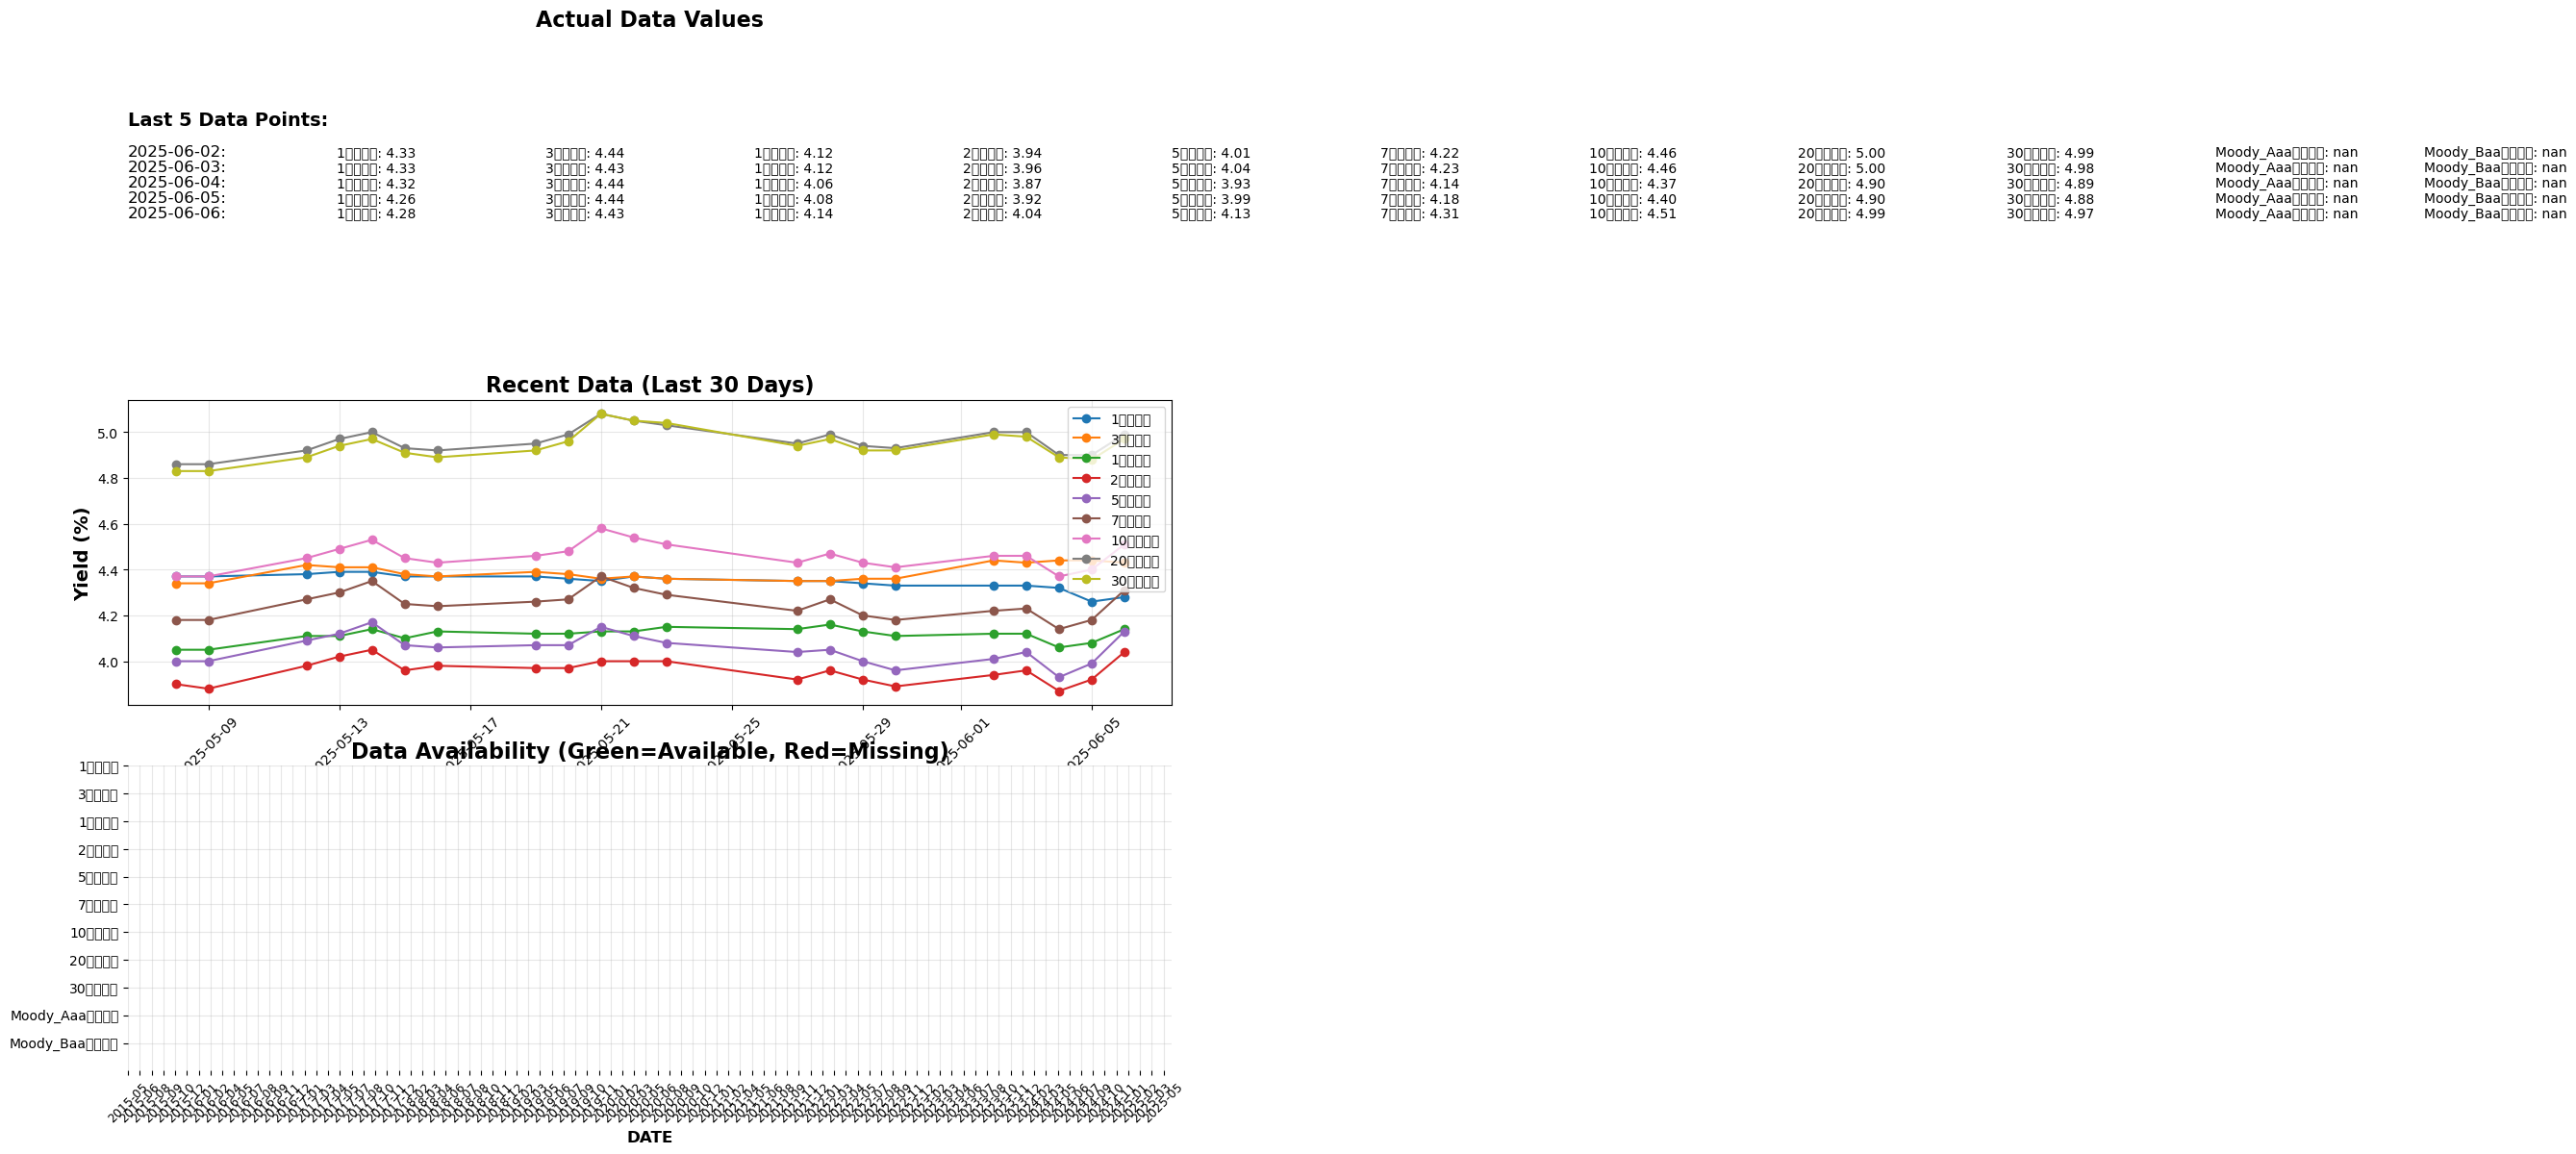

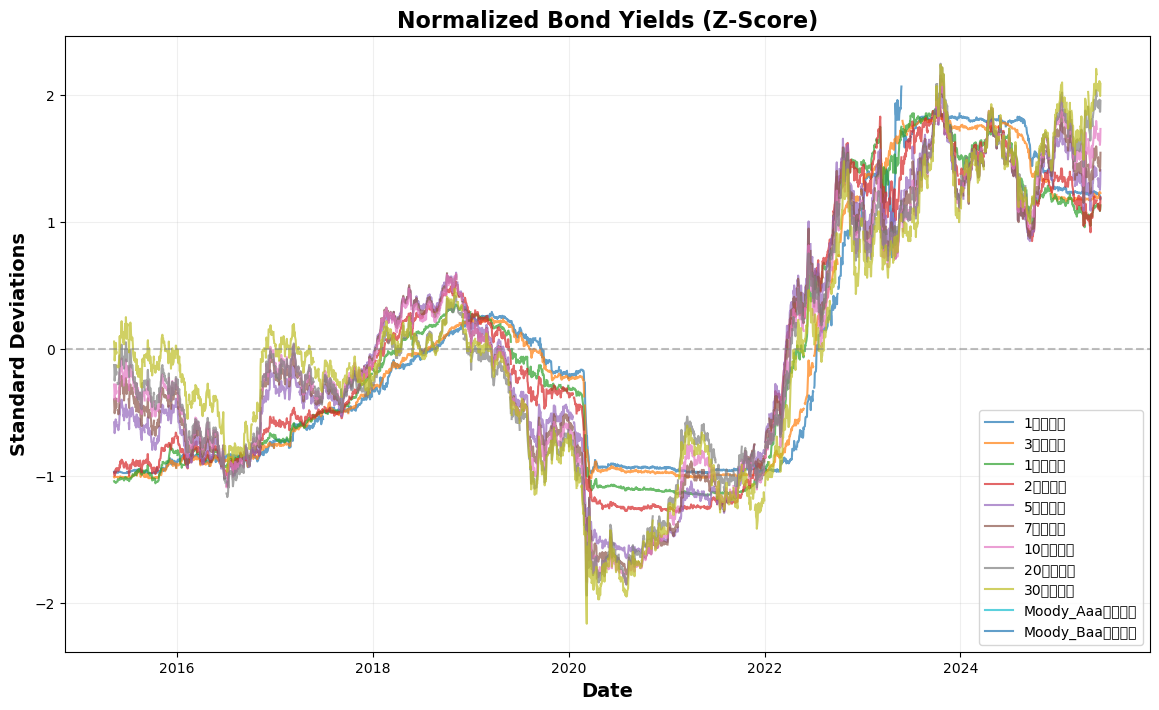

In [136]:
# Create enhanced diagnostic plot
plt.figure(figsize=(14, 14))

# Get the first date with data
first_valid_date = combined_df.last_valid_index()  # Gets last valid date (reverse chronological)
diagnostic_date = first_valid_date or datetime.today()

print(f"\n{'='*50}")
print(f"DATA VISIBILITY DIAGNOSTICS - {timestamp}")
print("="*50)

# Panel 1: Raw data values
ax1 = plt.subplot(3, 1, 1)
if not combined_df.empty:
    # Take last 5 data points
    sample_data = combined_df.tail().transpose()
    
    # Create text plot of actual values
    ax1.text(0, 0.7, "Last 5 Data Points:", fontsize=14, weight='bold')
    
    y_pos = 0.6
    for date, series in sample_data.items():
        date_str = date.strftime('%Y-%m-%d')
        ax1.text(0, y_pos, f"{date_str}:", fontsize=12)
        for i, (name, value) in enumerate(series.items()):
            ax1.text(0.2 + i*0.2, y_pos, f"{name}: {value:.2f}", fontsize=10)
        y_pos -= 0.05
else:
    ax1.text(0.5, 0.5, 'NO DATA IN DATAFRAME', ha='center', va='center', fontsize=16)
ax1.set_title('Actual Data Values', fontsize=16)
ax1.axis('off')

# Panel 2: Plot of recent data points (zoomed in)
ax2 = plt.subplot(3, 1, 2)
if not combined_df.empty:
    try:
        # Get last 30 days of data
        recent_df = combined_df.last('30D')
        
        for col in combined_df.columns:
            clean_series = recent_df[col].dropna()
            if not clean_series.empty:
                ax2.plot(clean_series.index, clean_series, 'o-', label=col)
        
        ax2.set_title('Recent Data (Last 30 Days)', fontsize=16)
        ax2.set_ylabel('Yield (%)', fontsize=14)
        ax2.legend(fontsize=10)
        ax2.grid(alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        # Print min/max values
        print("Recent value ranges:")
        for col in combined_df.columns:
            clean_series = recent_df[col].dropna()
            if not clean_series.empty:
                print(f"- {col}: min={clean_series.min():.2f}, max={clean_series.max():.2f}")
            else:
                print(f"- {col}: NO VALID DATA")
    except Exception as e:
        ax2.text(0.5, 0.5, f'ERROR IN PLOTTING:\n{str(e)}', ha='center', va='center', fontsize=12)
else:
    ax2.text(0.5, 0.5, 'NO DATA TO PLOT', ha='center', va='center', fontsize=16)
    ax2.set_title('Data Unavailable', fontsize=16)

# Panel 3: Data availability heatmap
ax3 = plt.subplot(3, 1, 3)
if not combined_df.empty:
    # Create data availability matrix (1 = valid, 0 = NaN)
    data_availability = combined_df.notnull().astype(int)
    
    # Plot availability heatmap
    sns.heatmap(data_availability.T, cbar=False, ax=ax3,
                cmap=['red', 'green'], linewidths=0.5)
    
    # Customize ticks
    ax3.set_title('Data Availability (Green=Available, Red=Missing)', fontsize=16)
    ax3.set_yticks(range(len(combined_df.columns)))
    ax3.set_yticklabels(combined_df.columns, fontsize=10)
    
    # Only show every 30th date label to avoid clutter
    xticks = list(range(0, len(combined_df), 30))
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([combined_df.index[i].strftime('%Y-%m') for i in xticks],
                        rotation=45, fontsize=9)
    
    # Print completeness statistics
    print("\nData completeness statistics:")
    for col in combined_df.columns:
        completeness = combined_df[col].notnull().mean() * 100
        print(f"- {col}: {completeness:.1f}% available")
else:
    ax3.text(0.5, 0.5, 'NO DATA FOR AVAILABILITY CHECK', 
             ha='center', va='center', fontsize=16)

# Save diagnostic report
plt.tight_layout()
diagnostic_path = f'data/raw/data_diagnostic_{timestamp}.png'
plt.savefig(diagnostic_path)
print("\n" + "="*50)
print(f"Diagnostic report saved to: {diagnostic_path}")
print("="*50)

# Step 2: Check fundamental data issues
print("\nFundamental Data Checks:")
if combined_df.empty:
    print("CRITICAL: DataFrame is completely empty")
    print("Solution: Verify FRED API connection and data retrieval")
elif combined_df.isnull().all().all():
    print("CRITICAL: DataFrame exists but contains only NULL values")
    print("Solution: Check date ranges and FRED data availability")
elif combined_df.select_dtypes(include=['object']).shape[1] > 0:
    object_cols = combined_df.select_dtypes(include=['object']).columns.tolist()
    print(f"WARNING: DataFrame contains non-numeric columns: {object_cols}")
    print("Solution: Convert data to numeric types with pd.to_numeric()")
else:
    # Calculate basic statistics
    data_stats = combined_df.describe().transpose()
    print("\nBasic Statistics:")
    print(data_stats[['min', 'mean', 'max']])
    
    # Detect constant values
    constant_cols = []
    for col in combined_df.columns:
        if combined_df[col].nunique() == 1:
            constant_cols.append(col)
    if constant_cols:
        print(f"\nWARNING: Constant values detected in: {constant_cols}")
        print("Solution: Verify these series with FRED source data")
    else:
        print("\nAll columns show value variation")

# Step 3: Create simplified visualization bypassing common issues
print("\nGenerating simplified visualization...")
plt.figure(figsize=(14, 8))

# Try plotting again with safeguards
if not combined_df.empty:
    # Normalize values if necessary to bring all series to similar scale
    norm_df = (combined_df - combined_df.mean()) / combined_df.std()
    
    # Create the plot
    for col in combined_df.columns:
        plt.plot(norm_df.index, norm_df[col], label=col, alpha=0.7)
    
    plt.title('Normalized Bond Yields (Z-Score)', fontsize=16)
    plt.ylabel('Standard Deviations', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=10, loc='best')
    plt.grid(alpha=0.2)
    plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
    
    simple_path = f'data/raw/simplified_view_{timestamp}.png'
    plt.savefig(simple_path)
    print(f"Simplified normalized plot saved to: {simple_path}")
    
    # Diagnostic suggestion based on plot
    if abs(norm_df.max().max()) < 0.01:
        print("\nWARNING: All values are essentially zero after normalization")
        print("This suggests extreme constant values or zero-variance data")
    else:
        print("\nNormalized visualization shows data variation")
else:
    print("No data available")

print("\nDiagnostic complete. Check generated reports in data/raw directory.")

Created Spread_AAA
Created Spread_BAA
Created Spread_Rating_Gap (BAA-AAA)


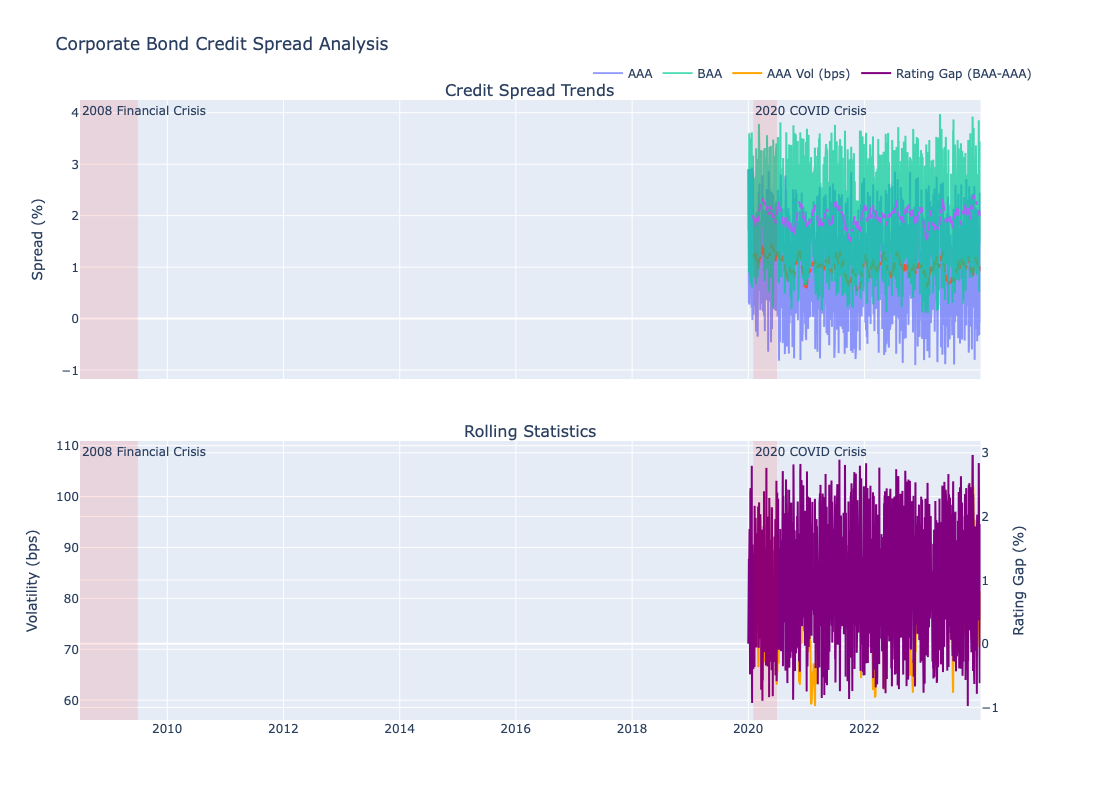


Credit Spread Descriptive Statistics:
        Spread_AAA   Spread_BAA
count  1461.000000  1461.000000
mean      1.009321     1.987923
std       0.810239     0.833086
min      -0.904230     0.105769
25%       0.450097     1.371922
50%       1.026998     1.978632
75%       1.582316     2.587233
max       2.933983     3.976835

Credit Spread Trend Decomposition (Example):

Current Credit Risk Assessment:
                      Spread_AAA Spread_BAA
Current Value            1.58753   3.440763
Historical Percentile      75.2%      95.8%
All-time High           2.933983   3.976835
From High                 -45.9%     -13.5%
Annual Volatility      12.862142  13.224825

No macroeconomic indicators available for analysis


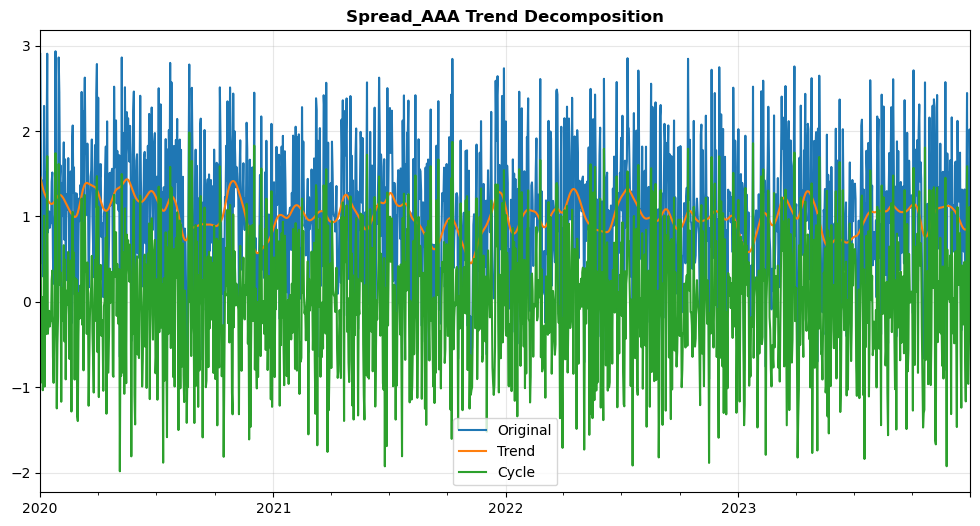

In [140]:
# Credit Spread Calculation & Visualization

# Define tenor mapping
tenor_map = {
    'AAA': 'DGS10',     # Aaa corporate bond -> 10Y Treasury
    'BAA': 'DGS10',     # Baa corporate bond -> 10Y Treasury
}

# Calculate credit spreads
spread_cols = []
for rating, treasury in tenor_map.items():
    if rating in df.columns and treasury in df.columns:
        spread_col = f'Spread_{rating}'
        df[spread_col] = df[rating] - df[treasury]
        spread_cols.append(spread_col)
        print(f"Created {spread_col}")

# Calculate rating gap
if 'Spread_BAA' in df.columns and 'Spread_AAA' in df.columns:
    df['Spread_Rating_Gap'] = df['Spread_BAA'] - df['Spread_AAA']
    print("Created Spread_Rating_Gap (BAA-AAA)")

# Create interactive credit spread chart
if not spread_cols:
    print("No credit spreads calculated. Check column names.")
else:
    # Create main figure
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.1,
        subplot_titles=("Credit Spread Trends", "Rolling Statistics"),
        specs=[[{"secondary_y": False}], [{"secondary_y": True}]]
    )

    # Add credit spread time series
    for col in spread_cols:
        # 30-day moving average
        ma_30 = df[col].rolling(window=30).mean()
        
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df[col], 
                name=col.replace('Spread_', ''),
                mode='lines',
                opacity=0.7,
                hovertemplate='%{y:.2f}%'
            ),
            row=1, col=1
        )
        
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=ma_30, 
                name=f'{col.replace("Spread_", "")} (30D MA)',
                mode='lines',
                line=dict(dash='dash'),
                showlegend=False
            ),
            row=1, col=1
        )

    # Add rolling statistics (30-day standard deviation)
    vol_col = spread_cols[0] if spread_cols else None
    if vol_col:
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df[vol_col].rolling(30).std() * 100,  # Convert to basis points
                name=f'{vol_col.replace("Spread_", "")} Vol (bps)',
                line=dict(color='orange'),
                hovertemplate='%{y:.0f}bps'
            ),
            row=2, col=1,
            secondary_y=False
        )   # Use the first available spread column for volatility

    # Add rating gap
    if 'Spread_Rating_Gap' in df.columns:
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df['Spread_Rating_Gap'], 
                name='Rating Gap (BAA-AAA)',
                line=dict(color='purple'),
                hovertemplate='%{y:.2f}%'
            ),
            row=2, col=1,
            secondary_y=True
        )

    # Add financial crisis markers as error data
    crisis_periods = {
        '2008 Financial Crisis': ('2008-07-01', '2009-06-30'),
        '2020 COVID Crisis': ('2020-02-01', '2020-06-30')
    }

    for event, (start, end) in crisis_periods.items():
        fig.add_vrect(
            x0=start, x1=end,
            fillcolor="red", opacity=0.1,
            line_width=0,
            annotation_text=event, annotation_position="top left",
            row="all", col=1
        )

    # Chart layout
    fig.update_layout(
        title='Corporate Bond Credit Spread Analysis',
        height=800,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        hovermode="x unified"
    )

    fig.update_yaxes(title_text="Spread (%)", row=1, col=1)
    fig.update_yaxes(title_text="Volatility (bps)", row=2, col=1, secondary_y=False)
    
    if 'Spread_Rating_Gap' in df.columns:
        fig.update_yaxes(title_text="Rating Gap (%)", row=2, col=1, secondary_y=True)

    # Show chart
    fig.show()


# In-depth Analysis
if spread_cols:
    # 1. Descriptive statistics
    spread_stats = df[spread_cols].describe()
    print("\nCredit Spread Descriptive Statistics:")
    print(spread_stats)
    
    # Trend analysis using Hodrick-Prescott filter
    def hp_filter(series, lambda_param=1600):
        """Separate trend and cycle components"""
        cycle, trend = sm.tsa.filters.hpfilter(series, lamb=lambda_param)
        return pd.DataFrame({'Original': series, 'Trend': trend, 'Cycle': cycle})
    
    print("\nCredit Spread Trend Decomposition (Example):")
    # Use the first available spread for decomposition
    example_spread = spread_cols[0]
    spread_trend = hp_filter(df[example_spread])
    spread_trend.plot(title=f"{example_spread} Trend Decomposition", figsize=(12, 6))
    
    # Risk assessment
    def calculate_risk_position(spread):
        """Calculate current spread position relative to history"""
        current = spread.iloc[-1]
        percent_rank = (spread < current).mean() * 100
        max_level = spread.max()
        pct_from_high = (current - max_level) / max_level * 100
        daily_vol = spread.std()
        annual_vol = daily_vol * np.sqrt(252)
        
        return {
            'Current Value': current,
            'Historical Percentile': f"{percent_rank:.1f}%",
            'All-time High': max_level,
            'From High': f"{pct_from_high:.1f}%",
            'Annual Volatility': annual_vol
        }
    
    print("\nCurrent Credit Risk Assessment:")
    risk_assessment = {}
    for col in spread_cols:
        risk_assessment[col] = calculate_risk_position(df[col])
    
    risk_df = pd.DataFrame(risk_assessment)
    print(risk_df)
    
    # Macroeconomic impact analysis
    # Define macroeconomic indicators 
    macro_cols = ['VIXCLS', 'INDPRO', 'FEDFUNDS']  # Volatility, Industrial Production, Fed Funds Rate
    
    # Filter to available macro columns
    available_macro = [col for col in macro_cols if col in df.columns]
    
    if available_macro:
        # Calculate correlations
        corr_df = df[spread_cols + available_macro].dropna()
        correlation_matrix = corr_df.corr()
        
        print("\nCorrelation Between Credit Spreads and Macro Indicators:")
        print(correlation_matrix.loc[spread_cols, available_macro])
        
        # Create correlation heatmap
        fig = go.Figure(data=go.Heatmap(
            z=correlation_matrix.values,
            x=correlation_matrix.columns,
            y=correlation_matrix.index,
            colorscale='RdYlGn_r',
            zmin=-1, zmax=1,
            colorbar=dict(title='Correlation')
        ))
        fig.update_layout(
            title="Correlation Matrix: Credit Spreads vs Macro Indicators",
            width=800,
            height=600
        )
        fig.show()
        
        # Rolling correlations for the first spread
        if spread_cols:
            primary_spread = spread_cols[0]
            for macro in available_macro:
                df[f'{primary_spread}_Corr_{macro}'] = (
                    df[primary_spread].rolling(90).corr(df[macro])
                )
            
            # Plot rolling correlations
            fig = go.Figure()
            for macro in available_macro:
                fig.add_trace(go.Scatter(
                    x=df.index,
                    y=df[f'{primary_spread}_Corr_{macro}'],
                    name=f'{primary_spread} vs {macro} (90D Rolling Corr)'
                ))
            
            fig.update_layout(
                title=f"Rolling Correlation: {primary_spread} vs Macro Indicators",
                yaxis_title="Correlation",
                hovermode="x"
            )
            fig.show()
    else:
        print("\nNo macroeconomic indicators available for analysis")
else:
    print("\nNo credit spreads available for in-depth analysis")